Artificial Neural Networks <br>
Nikos Periklis Chourdas - tp4774 <br>
nikos.hourdas@gmail.com 

In [67]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn as sk 


import seaborn as sb 

importing data set 

In [68]:

dataset_names = ['Age', 'Year operation', 'Axillary nodes detected', 'Survival status']

dataset = pd.read_csv("haberman.data",names = dataset_names) 
# {debug} check to make sure data is loaded correctly
# print(dataset)

exploring the Dataset 

In [69]:
dataset.head(5)

,Age,Year operation,Axillary nodes detected,Survival status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


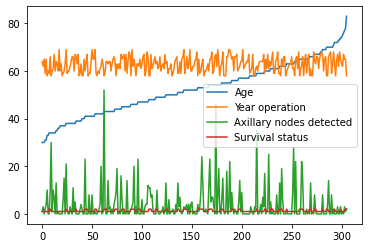

In [70]:
dataset.plot()
plt.show()

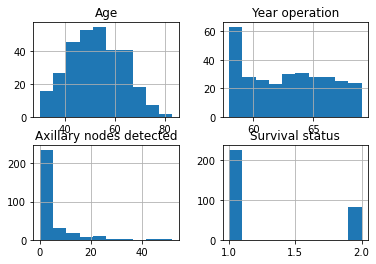

In [71]:
dataset.hist()
plt.show()

visualization using scatter plot 

In [72]:
dataset.shape

(306, 4)

In [73]:

temp_Array = dataset.values

X = temp_Array[:,:3]
target = temp_Array[:,3]

In [77]:
# Debugging 

# np.shape(dataset)
# print(dataset.columns)

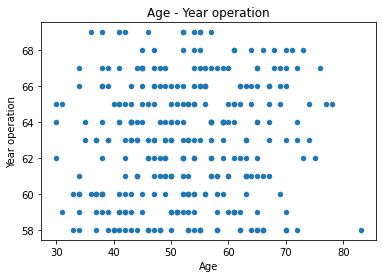

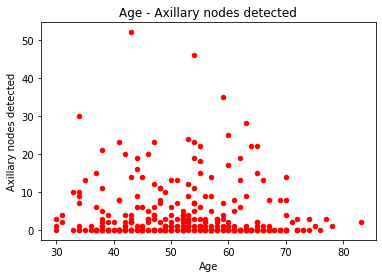

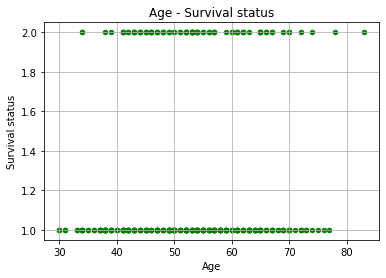

In [76]:


dataset.plot(kind = "scatter" , x = "Age" , y = "Year operation", title = "Age - Year operation")

dataset.plot(kind = "scatter" , x = "Age" , y = "Axillary nodes detected",color = "red",title = "Age - Axillary nodes detected")

dataset.plot(kind = "scatter" , x = "Age" , y = "Survival status",color="green", title = "Age - Survival status")

plt.grid()
plt.show()


import libraries for data split 

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# starting split rate 80% training data - 20% test set 

Dataset_Train, Dataset_Test , Target_Train , Target_Test = train_test_split(dataset,target,test_size = 0.2 , random_state = 42)

Dataset_Train = MinMaxScaler().fit_transform(Dataset_Train)

Dataset_Test = MinMaxScaler().fit_transform(Dataset_Test)

In [91]:
# debug 
# print(Dataset_Train)
# print(Dataset_Test)

network Training 